In [2]:
import pandas as pd

## Explore Album Data

In [ ]:
album_df = pd.read_csv(
    "../data/albums.csv", 
    index_col = 'album_name',
    parse_dates = ['release_date'])

In [ ]:
# Weeks since previous release
album_df.sort_values(by = 'release_date')['release_date'].diff().astype('timedelta64[W]').plot.bar()

In [ ]:
# Number of tracks
album_df.sort_values(by = 'release_date')['total_tracks'].plot.bar()

## Explore Track Data

In [3]:
track_df = pd.read_csv(
    '../data/tracks.csv', 
    index_col = 'track_name'
)

array([[<AxesSubplot:title={'center':'track_length_ms'}>,
        <AxesSubplot:title={'center':'track_number'}>,
        <AxesSubplot:title={'center':'track_acousticness'}>,
        <AxesSubplot:title={'center':'track_danceability'}>],
       [<AxesSubplot:title={'center':'track_energy'}>,
        <AxesSubplot:title={'center':'track_instrumentalness'}>,
        <AxesSubplot:title={'center':'track_key'}>,
        <AxesSubplot:title={'center':'track_liveness'}>],
       [<AxesSubplot:title={'center':'track_loudness'}>,
        <AxesSubplot:title={'center':'track_mode'}>,
        <AxesSubplot:title={'center':'track_speechiness'}>,
        <AxesSubplot:title={'center':'track_tempo'}>],
       [<AxesSubplot:title={'center':'track_time_signature'}>,
        <AxesSubplot:title={'center':'track_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

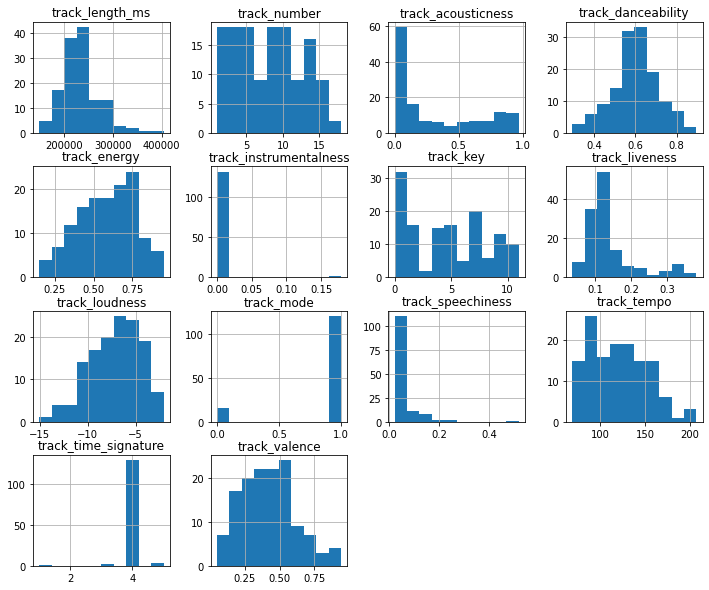

In [4]:
track_df.hist(figsize = (12, 10))

## Average Track Feature by Album

In [ ]:
track_avgs = track_df.groupby('album_name').mean()

In [ ]:
track_avgs = pd.merge(
    left = track_avgs,
    right = album_df,
    on = 'album_name',
    how = 'left'
)

In [ ]:
track_avgs.sort_values(by = 'release_date').plot.bar(
    legend = False,
    subplots = True, 
    layout = (4,4), 
    figsize = (12, 10)
)

In [ ]:
def avg_track_feature_by_album(feature):

    track_avg = track_df.groupby('album_name')[feature].mean()

    track_avg = pd.merge(
        left = track_avg,
        right = album_df,
        on = 'album_name',
        how = 'left'
    )

    track_avg.sort_values(by = 'release_date').plot.bar(y = feature)

In [ ]:
avg_track_feature_by_album('track_acousticness')